In [1]:
import pandas as pd
import numpy 
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fm
import dash
from dash import dcc, html
import plotly.express as px

In [2]:
df= pd.read_csv('January_MyCall_2022.csv')

In [3]:
df.shape

(620, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   operator           620 non-null    object 
 1   inout_travelling   620 non-null    object 
 2   network_type       620 non-null    object 
 3   rating             620 non-null    int64  
 4   calldrop_category  620 non-null    object 
 5   latitude           620 non-null    float64
 6   longitude          620 non-null    float64
 7   state_name         620 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 38.9+ KB


In [5]:

df.head(10)

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name
0,BSNL,Indoor,3G,3,Satisfactory,-1.000000,-1.000000,NA
1,BSNL,Indoor,2G,3,Poor Voice Quality,-1.000000,-1.000000,NA
2,BSNL,Indoor,2G,3,Satisfactory,-1.000000,-1.000000,NA
3,BSNL,Indoor,3G,3,Satisfactory,-1.000000,-1.000000,NA
4,RJio,Outdoor,4G,4,Satisfactory,18.519782,73.856190,Maharashtra
5,RJio,Outdoor,4G,4,Satisfactory,18.519782,73.856190,Maharashtra
6,RJio,Outdoor,4G,4,Satisfactory,18.519751,73.856182,Maharashtra
7,RJio,Indoor,4G,4,Satisfactory,18.519790,73.856216,Maharashtra
8,RJio,Outdoor,4G,4,Satisfactory,18.519780,73.856229,Maharashtra
9,RJio,Indoor,4G,4,Satisfactory,18.519746,73.856178,Maharashtra


In [6]:

# Remove rows with identical data across all columns
df= df.drop_duplicates()



In [7]:
df.shape

(245, 8)

In [8]:
df.head()

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name
0,BSNL,Indoor,3G,3,Satisfactory,-1.000000,-1.000000,NA
1,BSNL,Indoor,2G,3,Poor Voice Quality,-1.000000,-1.000000,NA
2,BSNL,Indoor,2G,3,Satisfactory,-1.000000,-1.000000,NA
4,RJio,Outdoor,4G,4,Satisfactory,18.519782,73.856190,Maharashtra
6,RJio,Outdoor,4G,4,Satisfactory,18.519751,73.856182,Maharashtra


In [9]:
df.head()

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name
0,BSNL,Indoor,3G,3,Satisfactory,-1.000000,-1.000000,NA
1,BSNL,Indoor,2G,3,Poor Voice Quality,-1.000000,-1.000000,NA
2,BSNL,Indoor,2G,3,Satisfactory,-1.000000,-1.000000,NA
4,RJio,Outdoor,4G,4,Satisfactory,18.519782,73.856190,Maharashtra
6,RJio,Outdoor,4G,4,Satisfactory,18.519751,73.856182,Maharashtra


In [10]:
call_drop_rate = df[df['calldrop_category'] == 'Call Dropped'].groupby(['operator', 'network_type']).size() / df.groupby(['operator', 'network_type']).size()

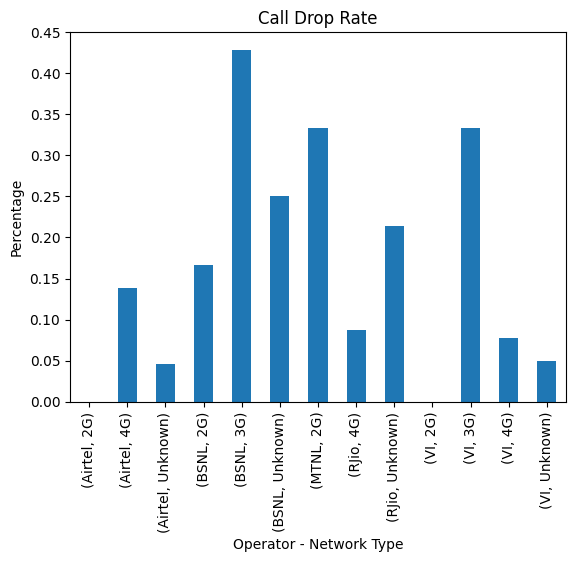

In [11]:
# 1. Call Drop Rate (CDR)
call_drop_rate.plot(kind='bar', title='Call Drop Rate')
plt.xlabel('Operator - Network Type')
plt.ylabel('Percentage')
plt.show()



In [12]:
average_rating = df.groupby(['operator', 'network_type'])['rating'].mean()


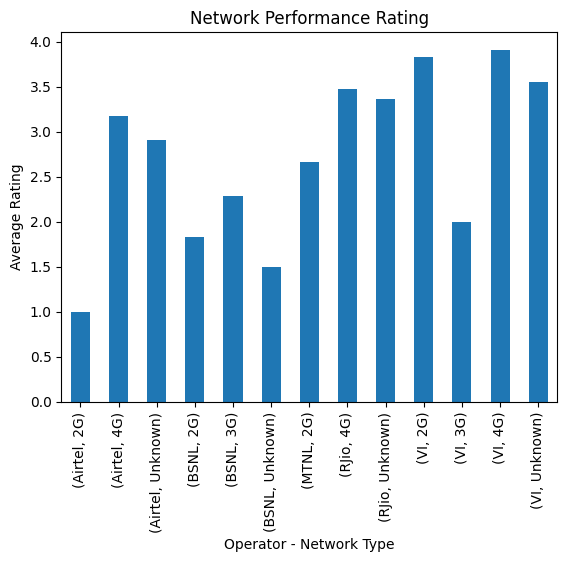

In [13]:
# 2. Network Performance Rating
average_rating.plot(kind='bar', title='Network Performance Rating')
plt.xlabel('Operator - Network Type')
plt.ylabel('Average Rating')
plt.show()

In [14]:
voice_quality_rating = df[df['calldrop_category'] == 'Poor Voice Quality'].groupby(['operator', 'network_type'])['rating'].mean()


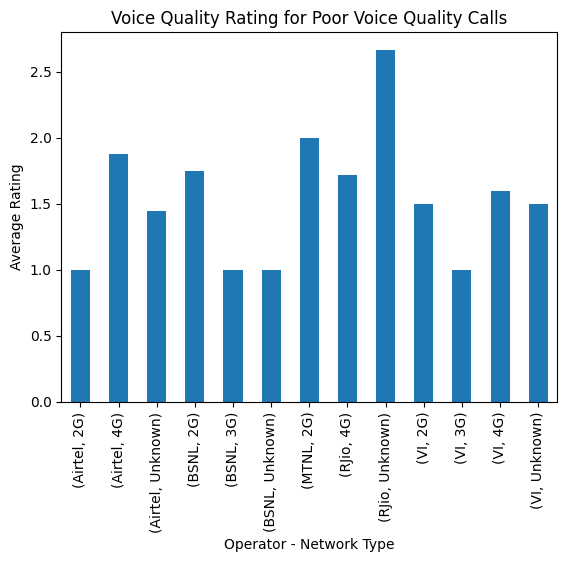

In [15]:
# 3. Voice Quality Rating
voice_quality_rating.plot(kind='bar', title='Voice Quality Rating for Poor Voice Quality Calls')
plt.xlabel('Operator - Network Type')
plt.ylabel('Average Rating')
plt.show()

In [16]:
m = fm.Map(location=[df['latitude'].iloc[0], df['longitude'].iloc[0]], zoom_start=10, width=800, height=500)

In [17]:
for index, row in df.iterrows():
    if row['latitude'] != -1 and row['longitude'] != -1:
        fm.Marker(location=[row['latitude'], row['longitude']], popup=f"Operator: {row['operator']}, Network Type: {row['network_type']}").add_to(m)


In [18]:
# Display the map in the Jupyter Notebook
m

In [19]:
average_latitude_longitude = df.groupby(['operator', 'network_type'])[['latitude', 'longitude']].mean()


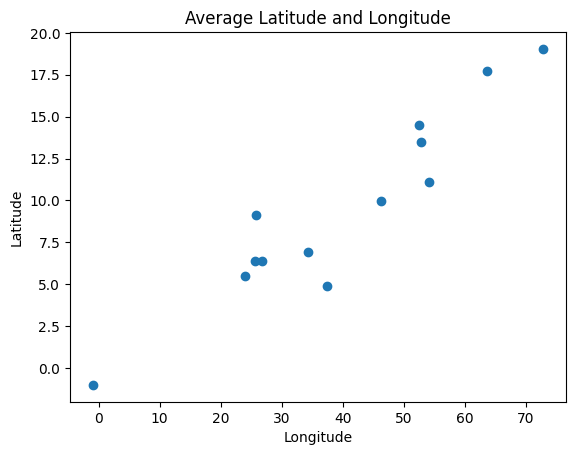

In [20]:
# Creating a scatter plot for latitude and longitude
plt.scatter(average_latitude_longitude['longitude'], average_latitude_longitude['latitude'])
plt.title('Average Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [21]:
m = fm.Map(location=[df['latitude'].iloc[0], df['longitude'].iloc[0]], zoom_start=10)

In [22]:
valid_coordinates = df[(df['latitude'] != -1) & (df['longitude'] != -1)].groupby(['operator', 'network_type']).size()

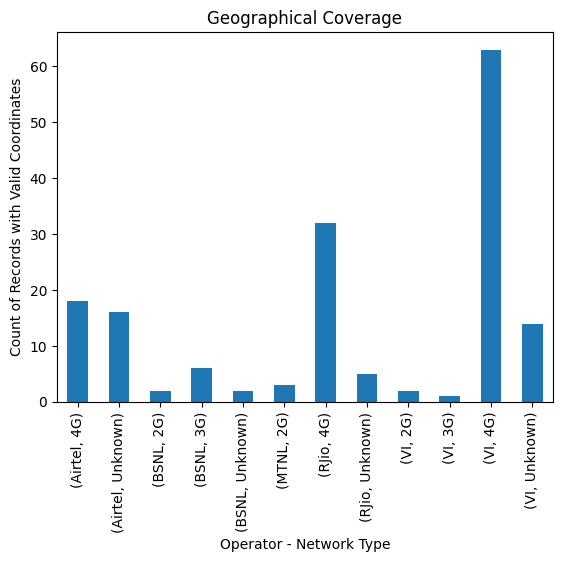

In [23]:
# 5. Geographical Coverage
valid_coordinates.plot(kind='bar', title='Geographical Coverage')
plt.xlabel('Operator - Network Type')
plt.ylabel('Count of Records with Valid Coordinates')
plt.show()

In [24]:

indoor_outdoor_quality = df.groupby(['operator', 'network_type', 'inout_travelling'])['rating'].mean().unstack(fill_value=0)

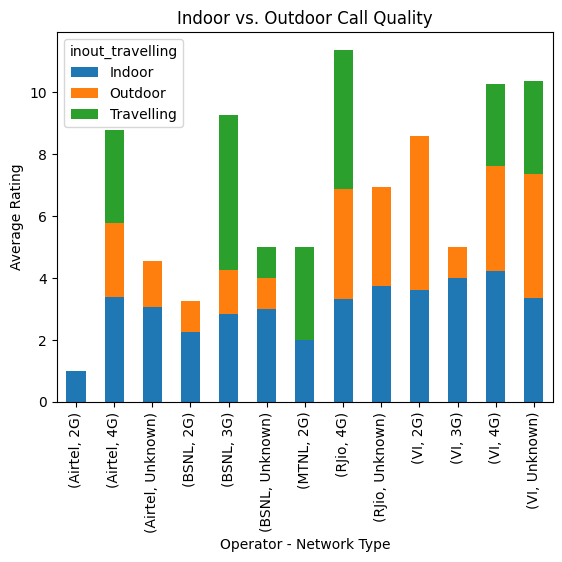

In [25]:
# 6. Indoor vs. Outdoor Call Quality
indoor_outdoor_quality.plot(kind='bar', stacked=True, title='Indoor vs. Outdoor Call Quality')
plt.xlabel('Operator - Network Type')
plt.ylabel('Average Rating')
plt.show()

In [26]:
overall_satisfaction = df['rating'].mean()

In [27]:
print(f'Overall Network Satisfaction: {overall_satisfaction:.2f}')

Overall Network Satisfaction: 3.36


In [28]:
app = dash.Dash(__name__)

In [29]:
app.layout = html.Div([
    html.H1("Network Performance Dashboard"),
    dcc.Graph(figure=px.scatter(df, x='longitude', y='latitude', color='operator', title='Network Operators')),
    dcc.Graph(figure=px.bar(df, x='operator', y='rating', title='Average Network Rating by Operator')),
    # Add more graphs or components here as needed
])


In [30]:
if __name__ == '__main__':
    app.run_server(debug=True, mode="inline", host="localhost", port=8050)
